# Relationship Between Variables and Patient Death

In this analytical project, we investigate the relationship between the use of certain drugs and the presence of certain conditions in patients with the frequency of their mortality. We will run the following tests:

- Chi-Squared test to establish the relationship between mortality and categorical variables
- Shapiro-Wilk for numerical variables splitted by 'death' variable:
  - T-Test - if shapiro_wilk indicates that both samples have a normal distribution
  - Mann-Whitney - if shapiro_wilk indicates that both samples do not have a normal distribution

In [1]:
import pandas as pd 
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

## Data preparation

Let's a little explore our data and prepare them for the further manipulations.


In [2]:
data = pd.read_csv('medical_data.csv')
data.dtypes

death               int64
amiodarone          int64
loop_diuretics      int64
ivabradine          int64
ARB                 int64
digoxin             int64
MRA                 int64
heart_failure       int64
AOS                 int64
SBP               float64
DBP               float64
PLT               float64
LDL               float64
HDL               float64
LVEF              float64
Na+               float64
K+                float64
MPV               float64
dtype: object

In [3]:
data.isnull().sum() # great

death             0
amiodarone        0
loop_diuretics    0
ivabradine        0
ARB               0
digoxin           0
MRA               0
heart_failure     0
AOS               0
SBP               0
DBP               0
PLT               0
LDL               0
HDL               0
LVEF              0
Na+               0
K+                0
MPV               0
dtype: int64

In [4]:
# Split the dataset into categorical and numerical data

numeric_cols = ['death', 'SBP', 'DBP', 'PLT', 'LDL', 'HDL',
       'LVEF', 'Na+', 'K+', 'MPV']

category_data = data.select_dtypes('int64')

# Split the numerical data by 'death' column
numeric_death = data[numeric_cols][data.death == 1].reset_index(drop=True)
numeric_no_death = data[numeric_cols][data.death == 0].reset_index(drop=True)

## Analyze categorical variables

In [5]:
# run Chi-Squared Test
chi_square = []

for col in category_data.columns[1:]:
    contigency = pd.crosstab(category_data.death, category_data[col])
    chi2, p, dof, expected = stats.chi2_contingency(contigency)
    chi_square.append((col, round( p, 4)))

chi_square.sort(key=lambda x:x[1], reverse=True)
chi_square

[('AOS', 0.974),
 ('digoxin', 0.5185),
 ('MRA', 0.2884),
 ('ARB', 0.2338),
 ('ivabradine', 0.0144),
 ('amiodarone', 0.0),
 ('loop_diuretics', 0.0),
 ('heart_failure', 0.0)]

Now we can visualize which categorical variables are associated with a mortality.

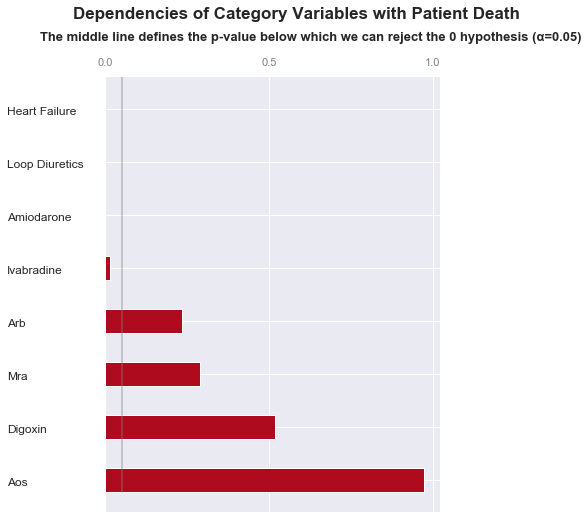

In [6]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh([agent[0].replace('_', ' ').title()   for agent in chi_square],
        [chi[1] for chi in chi_square],
        height=0.45,
        color='#af0b1e') 
ax.text(x=-0.1, y=8.7, s='Dependencies of Category Variables with Patient Death',
        size=17, weight='bold')
ax.text(x=-0.2, y=8.3, s='The middle line defines the p-value below which we can reject the 0 hypothesis (α=0.05)',
        size=13, weight='bold')
ax.set_xticks([0, 0.5, 1])
ax.xaxis.tick_top()

# yticklabels on the same level
ax.set_yticklabels([]) 
agents_names = [agent[0].replace('_', ' ').title() for agent in chi_square]
for i, agent in zip(range(9), agents_names):
    ax.text(x=-0.3, y=i-0.10, s=agent)
    
# add middle line 
ax.axvline(x=0.05, ymin=0.045, c='grey', alpha=0.5)

# remove all extra fields and lines
    
ax.tick_params(bottom=False, left=False, top=False, colors='grey') # add top!!!
for location in ['left', 'right', 'bottom', 'top']:  # delete all spines 
    ax.spines[location].set_visible(False)

## Analyze numerical variables

In [7]:
shapiro_wilk = []
mann_whitney = []
ttest = []

mann_ttest = []

for col in numeric_death.columns[1:]:
    p_no_death = round(stats.shapiro(numeric_no_death[col])[1], 4)
    p_death = round(stats.shapiro(numeric_death[col])[1], 4)
    shapiro_wilk.append((col, (p_no_death, p_death)))
    
    if (p_death > 0.05) & (p_no_death > 0.05):
        p = round(stats.ttest_ind(numeric_death[col], numeric_no_death[col], equal_var = False)[1], 4)
        ttest.append((col, p))
    else:
        p = round(stats.mannwhitneyu(numeric_death[col], numeric_no_death[col])[1], 4)
        mann_whitney.append((col, p))
    mann_ttest.append((col, p))
    
mann_ttest.sort(key=lambda x:x[1], reverse=True)
mann_ttest

[('LDL', 0.8392),
 ('PLT', 0.4739),
 ('MPV', 0.4331),
 ('K+', 0.4284),
 ('Na+', 0.2143),
 ('SBP', 0.0),
 ('DBP', 0.0),
 ('HDL', 0.0),
 ('LVEF', 0.0)]

We can analyze numerical variables as well:

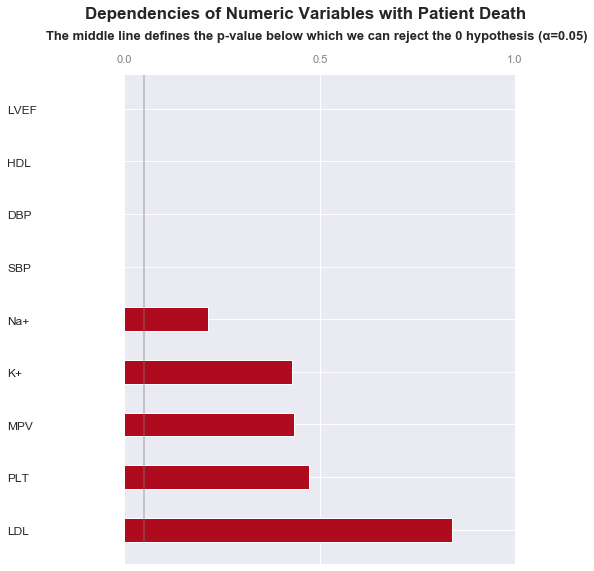

In [8]:
fig, ax = plt.subplots(figsize=(7, 9))
ax.barh([agent[0] for agent in mann_ttest],
        [p[1] for p in mann_ttest],
        height=0.45,
        color='#af0b1e') 
ax.text(x=-0.1, y=9.7, s='Dependencies of Numeric Variables with Patient Death',
        size=17, weight='bold')
ax.text(x=-0.2, y=9.3, s='The middle line defines the p-value below which we can reject the 0 hypothesis (α=0.05)',
        size=13, weight='bold')
ax.set_xticks([0, 0.5, 1])
ax.xaxis.tick_top()

ax.set_yticklabels([]) 
agent_names = [agent[0] for agent in mann_ttest]
for i, agent in zip(range(11), agent_names):
    ax.text(x=-0.3, y=i-0.10, s=agent)
    
# add middle line 
ax.axvline(x=0.05, ymin=0.045, c='grey', alpha=0.5)
    
ax.tick_params(bottom=False, left=False, top=False, colors='grey') # add top!!!
for location in ['left', 'right', 'bottom', 'top']:  # delete all spines 
    ax.spines[location].set_visible(False)

## Conclusions


As we found out, the following variables are highly likely to be associated with the death of patients:

- categorical:
  - Hearth Fealure
  - Loop diuretics 
  - Amiodarone
  - Ivabradine
  
- numerical:
  - LVEF (Left ventricular ejection fraction)
  - HDL (High-density lipoprotein)
  - DBP (Diastolic blood pressure)
  - SBP (Systolic Blood Pressure) 


Some drugs (or large doses of some drugs) are given to the patient only in a critical situation, as well as some conditions (for example, heart failure) may appear due to severe near-death changes in the body (so-called adaptation failure). 

We cannot be sure that these factors are the cause of death, but we know that they are related. 

In further research, we can find out more about relations between numerical variabler and mortality, as well as collect more data and try to explain whether these variables are really the cause of death, or is it just a consequence of pre-mortem changes and ongoing resuscitation actions.